<a href="https://colab.research.google.com/github/optimistme88/pytorch_tutorial/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# IRIS DataSet: https://archive.ics.uci.edu/dataset/53/iris

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model class that inherits nn.Module

class Model(nn.Module):
  # Input layer: 4 features of the flower
  # Hidden layer1: Number of neurons 8
  # Hidden layer2: Number of neurons 9
  # Output layer: 3 classes of output flowers
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate nn.Module
    # fc: fully connected
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

In [117]:
# Pick a manual seed for randomization

# With seed 42, predictions on all the test data are correct. Using 41 as it is used in the
# tutorial.
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Load data from url https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [120]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [121]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [122]:
# Change last column from strings to floats
#pd.set_option('future.no_silent_downcasting', True)
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [123]:
# Train, test and split! Set X, Y

X = my_df.drop('variety', axis=1)
Y = my_df['variety']

X
Y

# Convert these to numpy arrays

X = X.values
y = Y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8516881465911865
Epoch: 30 and loss: 0.6555687189102173
Epoch: 40 and loss: 0.45029518008232117
Epoch: 50 and loss: 0.2718472480773926
Epoch: 60 and loss: 0.1553877890110016
Epoch: 70 and loss: 0.09336269646883011
Epoch: 80 and loss: 0.06463461369276047
Epoch: 90 and loss: 0.05066271126270294


Text(0.5, 0, 'Epoch')

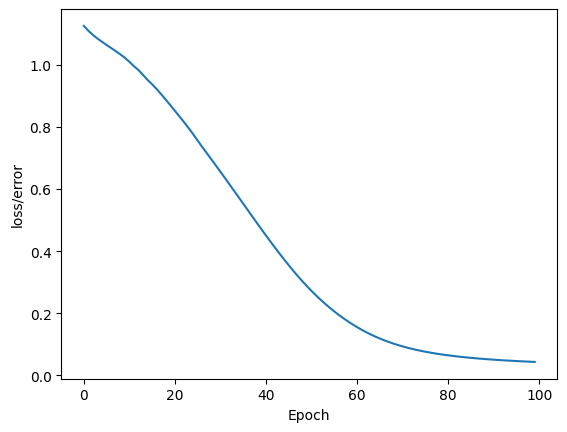

In [124]:
from sklearn.model_selection import train_test_split
import numpy as np

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert X features to Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert Y labels to LongInt
X_test
y_train = torch.from_numpy(y_train.astype(np.int64))
y_test = torch.from_numpy(y_test.astype(np.int64))

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs).,
# lower our learning rate.)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print ever 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')



In [125]:
# Evaluate model on test data set (Validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions

  loss = criterion(y_eval, y_test) # Find the loss or error

loss

tensor(0.1295)

In [126]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'test {i+1}, {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'we got {correct} correct predictions!')

test 1, tensor([0.0000, 7.4447, 9.9152]) 	 2 	 2
test 2, tensor([ 0.0000,  7.7042, 14.3743]) 	 2 	 2
test 3, tensor([ 0.0000,  9.1280, 15.1753]) 	 2 	 2
test 4, tensor([0.2102, 8.3280, 4.5364]) 	 1 	 1
test 5, tensor([ 0.0000,  8.4035, 12.4779]) 	 2 	 2
test 6, tensor([1.6255, 8.0527, 1.9799]) 	 1 	 1
test 7, tensor([0.0000, 8.0659, 9.2757]) 	 2 	 2
test 8, tensor([0.3294, 8.4105, 4.3070]) 	 1 	 1
test 9, tensor([ 0.0000,  8.2367, 10.8423]) 	 2 	 2
test 10, tensor([ 0.0000,  8.1941, 15.2505]) 	 2 	 2
test 11, tensor([0.0000, 7.9806, 8.7350]) 	 2 	 2
test 12, tensor([8.9715, 3.4637, 0.0000]) 	 0 	 0
test 13, tensor([8.0554, 3.1741, 0.0000]) 	 0 	 0
test 14, tensor([2.2377, 6.4805, 0.4353]) 	 1 	 1
test 15, tensor([8.0202, 3.9148, 0.0000]) 	 0 	 0
test 16, tensor([0.0000, 8.1254, 8.0101]) 	 2 	 1
test 17, tensor([8.3626, 3.3009, 0.0000]) 	 0 	 0
test 18, tensor([0.0000, 7.6349, 9.5548]) 	 1 	 2
test 19, tensor([8.9383, 3.4532, 0.0000]) 	 0 	 0
test 20, tensor([7.5003, 3.3025, 0.0000]) 	 

In [130]:
# Evaluate new data on the network

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  #eval = model.forward(new_iris)
  print(model(new_iris2))

  #print(eval)

tensor([ 0.0000,  7.5979, 10.1487])


In [131]:
# Save our NN model
torch.save(model.state_dict(), 'my_first_iris_model.pt')

In [134]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_iris_model.pt'))

# Make sure it is loaded correctly

new_model.eval()

<ipython-input-134-7ff7f48c2d68>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_iris_model.pt'))


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [135]:
# Validate new model

new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  #eval = model.forward(new_iris)
  print(new_model(new_iris2))

tensor([ 0.0000,  7.5979, 10.1487])
